In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA




In [2]:
def confusion_matrix_heatmap(y_test, preds):
    """Function to plot a confusion matrix"""
    labels = list(set(y_test))   # get the labels in the y_test
    print(labels)
    cm = confusion_matrix(y_test, preds)
    #cm = confusion_matrix(y_test, preds, labels) para erro
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show() # ta-da!

In [3]:
def scatter_graph(x_test, y_test , species):
    plt.figure()
    plt.title('bank data 2d-projection')
    plt.scatter(x_test,y_test, c=species,cmap='rainbow')



In [4]:
bank_file = "bank.csv" 
data = pd.read_csv(bank_file)


In [5]:
data

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance
0,59,admin.,married,secondary,no,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,2343
1,56,admin.,married,secondary,no,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,45
2,41,technician,married,secondary,no,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1270
3,55,services,married,secondary,no,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,2476
4,54,admin.,married,tertiary,no,no,no,unknown,5,may,673,2,-1,0,unknown,yes,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,1
11158,39,services,married,secondary,no,no,no,unknown,16,jun,83,4,-1,0,unknown,no,733
11159,32,technician,single,secondary,no,no,no,cellular,19,aug,156,2,-1,0,unknown,no,29
11160,43,technician,married,secondary,no,no,yes,cellular,8,may,9,2,172,5,failure,no,0


In [6]:
data.dtypes


age           int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
balance       int64
dtype: object

In [7]:
data.shape

(11162, 17)

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit', 'balance'],
      dtype='object')

In [9]:
cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']
le = LabelEncoder()                       # initialise the necessary function taken from the LabelEncoder library
for col in cols:                          # iterate over all variables in cols
    data[col] = le.fit_transform(data[col])

In [10]:
data = data.sample(frac=1)

In [11]:
data

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance
8219,41,1,2,1,0,1,0,1,13,8,43,1,-1,0,3,0,925
5381,49,6,1,2,0,0,0,0,12,1,174,1,-1,0,3,0,599
2711,45,1,1,1,0,0,0,0,22,11,173,1,141,2,2,1,10252
10301,32,6,1,2,0,0,0,0,22,1,398,5,-1,0,3,0,102
2525,37,4,1,2,0,0,0,0,14,1,156,2,-1,0,3,1,1276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438,36,1,1,1,0,1,0,0,16,0,386,2,-1,0,3,0,1790
7705,51,4,1,2,0,1,0,0,25,5,268,2,-1,0,3,0,656
8389,26,9,2,1,0,0,0,0,23,5,91,7,-1,0,3,0,33
3228,23,8,2,1,0,0,0,0,15,3,201,3,186,2,2,1,431


In [12]:
X= data.drop(columns = 'deposit')
pca = PCA(n_components=3)
new_data = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.98742307 0.01143209 0.00112162]


In [13]:
# extract 'deposit' line from data as target 
target=data['deposit']
train= new_data

#cross validation 7:3
x_train = train[:-3000]
y_train = target[:-3000]
x_test = train[-3000:]
y_test = target[-3000:]

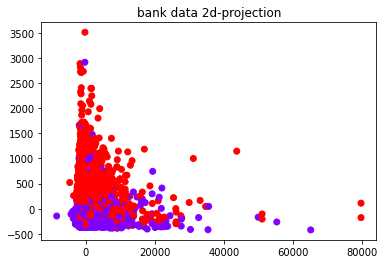

In [14]:
data_2d= data.drop(columns = 'deposit')
pca = PCA(n_components=2)
pca = pca.fit(data_2d)
x_2d = pca.transform(data_2d)
scatter_graph(x_2d[:,0], x_2d[:,1] , target)


[0, 1]


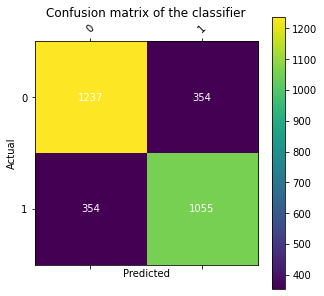

In [15]:
# knn model
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.predict(x_test)
confusion_matrix_heatmap(y_test,knn.predict(x_test))

In [16]:
knn.score(x_test , y_test)
# raw data 7:3 0.7503333333333333

0.764

In [17]:
# Logistic Regression  model

logReg = LogisticRegression(random_state=0).fit(x_train, y_train)

logReg.predict_proba(x_test)
logReg.score(x_test, y_test)
# raw data 0.771


0.7366666666666667

In [18]:
logReg.predict_proba(x_test)


array([[0.07808433, 0.92191567],
       [0.75411848, 0.24588152],
       [0.75162514, 0.24837486],
       ...,
       [0.82011331, 0.17988669],
       [0.57707285, 0.42292715],
       [0.68829141, 0.31170859]])

[0, 1]


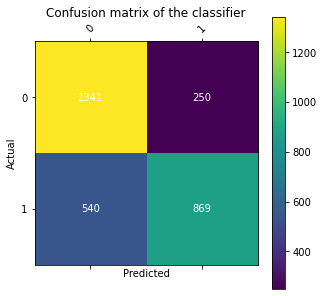

In [19]:
confusion_matrix_heatmap(y_test,logReg.predict(x_test))
